In [1]:
import dlib
import numpy as np
import sys, os, glob
from PIL import Image, ImageOps
import cv2
import math
import bisect
# from keypoint2img import scale_points, interPoints, drawEdge
from skimage import feature

# test ms_ssim

In [29]:
import torch
from pytorch_msssim import ssim,ms_ssim

In [50]:
original_img="G://pku/coding_test/Test_datasets/For_compression/image_face/"
compare_img="G://pku/coding_test/Test_datasets/For_compression/image_face_proposed/"

In [51]:
total=0
for i in range(0,10):
    ori=os.path.join(original_img,"%03d.png"%i)
    cmp=os.path.join(compare_img,"%03d.png"%i)
    if not os.path.exists(cmp):
        continue
    ori_img=Image.open(ori)
    cmp_img=Image.open(cmp)
    ori_ary=torch.from_numpy(np.array(ori_img)).unsqueeze(0).permute(0,3,1,2).type(torch.FloatTensor)
    cmp_ary=torch.from_numpy(np.array(cmp_img)).unsqueeze(0).permute(0,3,1,2).type(torch.FloatTensor)  
    score=ms_ssim(ori_ary,cmp_ary)
    print("msssim of %03d.png : %.4f"%(i,score))
    total=total+score
print(total/10)
#     print(ori_ary.min(),ori_ary.max())

msssim of 000.png : 0.8395
msssim of 001.png : 0.8882
msssim of 002.png : 0.7858
msssim of 003.png : 0.6826
msssim of 004.png : 0.8574
msssim of 005.png : 0.8607
msssim of 006.png : 0.8300
msssim of 007.png : 0.8209
msssim of 008.png : 0.7518
msssim of 009.png : 0.8329
tensor(0.8150)


In [10]:
original_img="G://pku/coding_test/Face_analysis/original/"
compare_img="G://pku/coding_test/Face_analysis/j2k/"
dst_img="G://pku/coding_test/Face_analysis/j2k/"
if not os.path.exists(dst_img):
    os.makedirs(dst_img)

In [11]:
for i in range(0,10):
#     ori=os.path.join(original_img,"%03d.png"%i)
    cmp=os.path.join(compare_img,"%03d.j2k"%i)
    cmp_img=Image.open(cmp)
    cmp_img.save("G://pku/coding_test/Face_analysis/j2k2png/"+"%03d.png"%i)

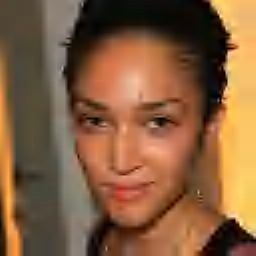

In [7]:
cmp_img

# Face landmark detection accuracy comparison

In [51]:
predictor_path = "K://pku/coding_test/Face_analysis/shape_predictor_68_face_landmarks.dat"
original_img="K://pku/coding_test/coding_comparison/For_SEAN_compression/image_face_comp/"
compare_img="K://pku/coding_test/coding_comparison/For_SEAN_compression/image_face_vvc/"
# original_img="K://pku/coding_test/Face_analysis/original/"
# compare_img="K://pku/coding_test/Face_analysis/jpeg_qp5/"

In [50]:
compare_img="K://pku/coding_test/coding_comparison/For_SEAN_compression/image_face_vvc/"
for i,f in enumerate(os.listdir(compare_img)):
    ori=os.path.join(compare_img,f)
    dst=os.path.join(compare_img,"%03d.png"%i)
    os.rename(ori,dst)

In [52]:
predictor = dlib.shape_predictor(predictor_path)
detector = dlib.get_frontal_face_detector()
nx=np.linspace(0,1,11)
l=[0 for i in range(12)]
total=0
num=0
nx=np.linspace(0,1,11)
for N,f in enumerate(os.listdir(original_img)):
    ori=os.path.join(original_img,f)
    cmp=os.path.join(compare_img,f.split('.')[0]+'.png')
#     cmp = os.path.join(compare_img,f[:-4]+".jpg")
    if not os.path.exists(cmp):
        continue
    ori_img=Image.open(ori)
    cmp_img=Image.open(cmp)
    ori_ary=np.array(ori_img)
    cmp_ary=np.array(cmp_img)
    
    dets_ori = detector(ori_ary, 1)
    dets_cmp=detector(cmp_ary,1)
    
    for k, d in enumerate(dets_ori):
#         print(ori,k,d)
        ori_face_mark = predictor(ori_ary, d)
        
    for k, d in enumerate(dets_cmp):
#         print(cmp,k,d)
        cmp_face_mark = predictor(cmp_ary, d)
    
    ori_landmarks = np.array([[p.x, p.y] for p in ori_face_mark.parts()])/255
    cmp_landmarks = np.array([[p.x, p.y] for p in cmp_face_mark.parts()])/255
#     print(cmp_landmarks)
    
    ierror=0
    for j in range(0,68):
        error=math.sqrt((ori_landmarks[j][0]-cmp_landmarks[j][0])**2+(ori_landmarks[j][1]-cmp_landmarks[j][1])**2)
        ierror=ierror+error
    print("image %s error: %.4f"%(cmp,ierror))
#     疑似累积误差分布
    idx=bisect.bisect_left(nx,ierror)
#         print(idx)
    for pp in range(idx,12):
#             print(pp)
        l[pp]=l[pp]+1
    total=total+ierror
print("average error: %.4f"%(total/(N+1)))
for q in range(0,12):
    l[q]=l[q]/10
print(l)
# print(num)
# print(num/126)

image K://pku/coding_test/coding_comparison/For_SEAN_compression/image_face_vvc/000.png error: 0.4465
image K://pku/coding_test/coding_comparison/For_SEAN_compression/image_face_vvc/001.png error: 0.5005
image K://pku/coding_test/coding_comparison/For_SEAN_compression/image_face_vvc/002.png error: 0.6463
image K://pku/coding_test/coding_comparison/For_SEAN_compression/image_face_vvc/003.png error: 0.6214
image K://pku/coding_test/coding_comparison/For_SEAN_compression/image_face_vvc/004.png error: 0.9236
average error: 0.6276
[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.4, 0.4, 0.4, 0.5, 0.5]


# Curve fit

In [5]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import numpy as np
from scipy import log


Bad key "legend.title_fontsize" on line 22 in
C:\Users\cjh09\.matplotlib\stylelib\notebook.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [12]:
j2k_y=np.array([1.9203,1.3773,1.1839,0.7898,0.7108,0.5564,0.5048,0.4752,0.4215])
j2k_x=np.array([0.0256,0.0316,0.0414,0.0449,0.0475,0.0491,0.0547,0.0608,0.0689])

In [14]:
j2k_xshow=np.array([0.0256,0.0316,0.0414,0.0491,0.0608,0.0689])
j2k_yshow=np.array([1.9203,1.3773,1.1839,0.5864,0.4752,0.4215])

In [9]:
bpg_x=[0.0581,0.0656,0.0735,0.0816,0.0922,0.1020]
bpg_y=[0.4125,0.3759,0.3412,0.3152,0.2694,0.2411]

In [10]:
bpg_xshow=[0.0656,0.0735,0.0816]

In [11]:
bpg_popt,bpg_pcov=curve_fit(func,bpg_x,bpg_y,maxfev=500000)
bpg_popt

array([19.22607878, -6.97886219,  0.75221955])

In [7]:
ours_x=[0.0201]
ours_y=[0.4318]

In [8]:
bpg_x=[0.0656]
bpg_y=[0.3759]

In [53]:
vvc_x=[0.0322]
vvc_y=[0.8392]

In [10]:
def func(x,a,b,c,d):
    return a*np.log(b/(x+d))+c
    #     return a * np.exp(-b * x) + c

In [13]:
popt,pcov=curve_fit(func,j2k_x,j2k_y)
popt

D:\Users\cjh09\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


array([ 0.75346698,  0.73247099, -1.70798169, -0.01970111])

In [57]:
popt[1]+=0.05

In [61]:
popt[2]+=0.02

In [67]:
popt[0]-=0.01

In [15]:
color={'blue0':(0.2, 0.4, 0.7),'green':(0.3,0.6,0.3),'blue1':(0.1,0.7,0.8),'blue2':(0.2,0.6,1.0),'purple':(0.4,0.1,0.3),'red':(0.9,0.1,0.0)}
markers = 'x^o+<.h'

D:\Users\cjh09\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


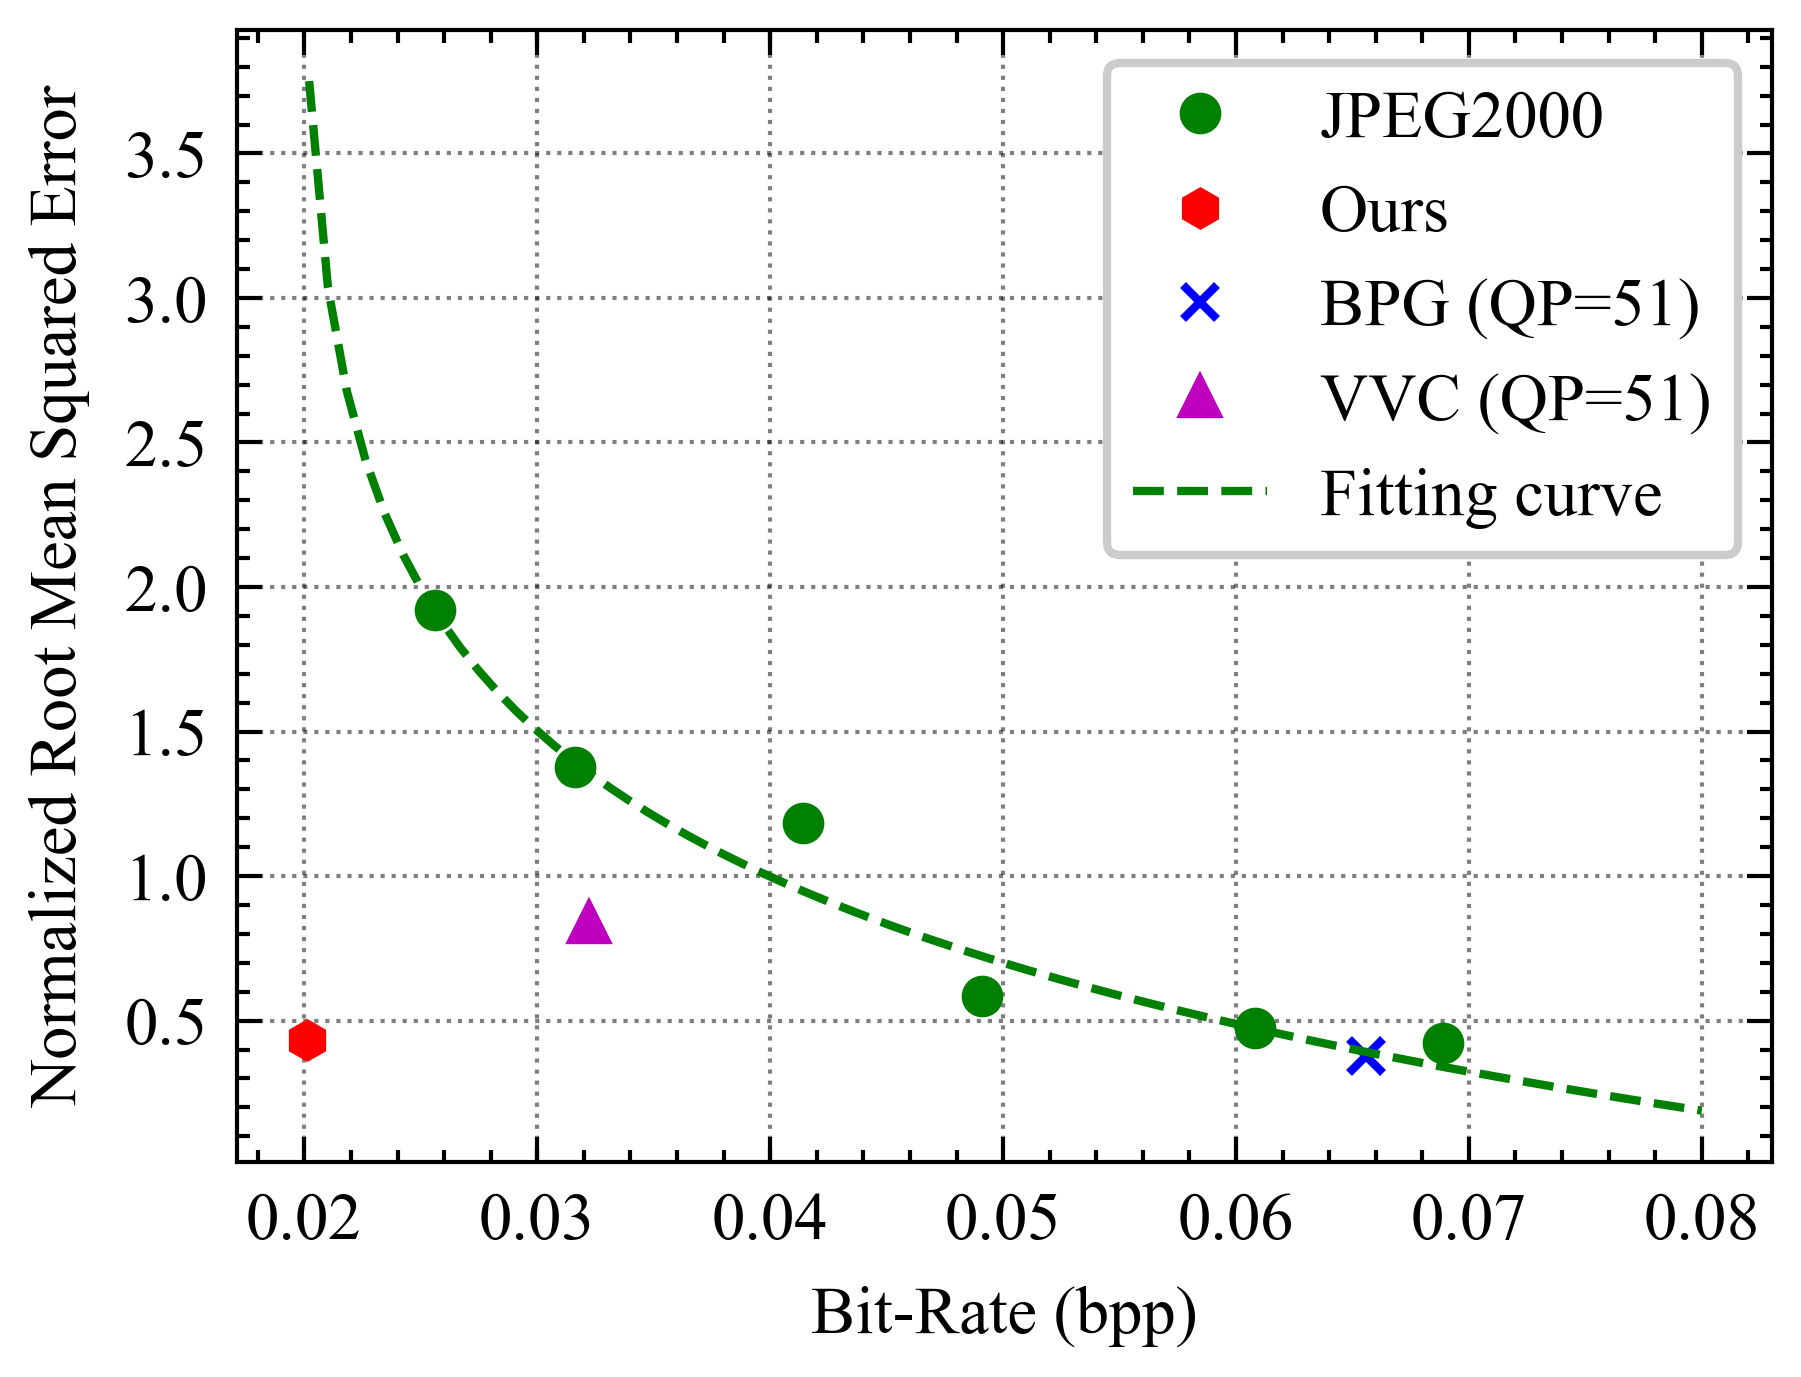

In [68]:
with plt.style.context(['science','ieee','no-latex','grid']):
#     plt.rcParams["font.weight"] = "bold"
#     plt.plot(j2k_xshow,func(j2k_xshow,*popt),'go',label='JPEG2000',markersize=4)
    plt.plot(j2k_xshow,j2k_yshow,'go',label='JPEG2000',markersize=4)
    plt.plot(ours_x,ours_y,'rh',label='Ours',markersize=4)
    plt.plot(bpg_x,bpg_y,'bx',label='BPG (QP=51)',markersize=4)
    plt.plot(vvc_x,vvc_y,'m^',label='VVC (QP=51)',markersize=4)
#     plt.plot(bpg_xshow,func(bpg_xshow,*bpg_popt),'ch',label='BPG')
    xdata=np.linspace(0,0.08,100)
    plt.plot(xdata,func(xdata,*popt),'g--',label='Fitting curve')
    plt.xlabel('Bit-Rate (bpp)',fontweight='bold')
    plt.ylabel('Normalized Root Mean Squared Error',fontweight='bold')
    font1={'weight':'bold'}
    plt.legend(prop=font1)
    plt.grid(True)
    plt.savefig('RATE_RMSE.png',dpi=600)
    plt.show()
 

In [16]:
plt.plot(ours_x,ours_y,'r.',lable='ours')
plt.show()

AttributeError: Unknown property lable

# Face datasets making

In [69]:
h, w = 256, 256
dir_data_hd = 'K://pku/coding_test/coding_comparison/For_SEAN_compression/image_faceb/'
dir_edge_hd = './celeba/edges/'
paired_dir='celeba/edge2image/'

predictor_path = 'shape_predictor_68_face_landmarks.dat'

# mapping from keypoints to face part
part_list = [
    [[68,69]+list(range(0, 17))+[70,71]],  # face
    [range(17, 22)],  # left eyebrow
    [range(22, 27)],  # right eyebrow
    [[28, 31], range(31, 36), [35, 28]],  # nose
    [[36, 37, 38, 39], [39, 40, 41, 36]],  # left eye
    [[42, 43, 44, 45], [45, 46, 47, 42]],  # right eye
    [range(48, 55), [54, 55, 56, 57, 58, 59, 48]],  # mouth
    [range(60, 65), [64, 65, 66, 67, 60]]  # tongue
]
label_list = [1, 2, 2, 3, 4, 4, 5, 6]
scale_ratio = np.array(
    [[0.9, 1], [1, 1], [0.9, 1], [1, 1.1], [0.9, 0.9], [0.9, 0.9]])  # np.random.uniform(0.9, 1.1, size=[6, 2])
scale_ratio_sym = np.array(
    [[1, 1], [0.9, 1], [1, 1], [0.9, 1], [1, 1], [1, 1]])  # np.random.uniform(0.9, 1.1, size=[6, 2])
scale_shift = np.zeros((6, 2))  # np.random.uniform(-5, 5, size=[6, 2])


In [5]:
for i, name in enumerate(os.listdir(dir_data_hd)):
    path = os.path.join(dir_data_hd, name)
    edge_save_dir = os.path.join(dir_edge_hd, name)
    paired_save_dir=os.path.join(paired_dir,name)
    img=Image.open(path)
    img_np = np.array(img)

    predictor = dlib.shape_predictor(predictor_path)
    detector = dlib.get_frontal_face_detector()
    dets = detector(img_np, 1)
    for k, d in enumerate(dets):
        face_mark = predictor(img_np, d)
    landmarks = np.array([[p.x, p.y] for p in face_mark.parts()])
    keypoints = landmarks.copy()
    
    # add upper half face by symmetry
    pts = keypoints[:17, :].astype(np.int32)
    baseline_y = (pts[0, 1] + pts[-1, 1]) / 2
    left_upper_pts = pts[1:3, :].copy()
    right_upper_pts = pts[-3:-1, :].copy()
    left_upper_pts[:, 1] = baseline_y + (baseline_y - left_upper_pts[:, 1]) * 2 // 3
    right_upper_pts[:, 1] = baseline_y + (baseline_y - right_upper_pts[:, 1]) * 2 // 3
    # upper_pts[:, 1] = baseline_y + (baseline_y - upper_pts[:, 1]) * 2 // 3
    keypoints = np.vstack((keypoints, left_upper_pts[::-1, :]))
    keypoints = np.vstack((keypoints, right_upper_pts[::-1, :]))
    # label map for facial part
    part_labels = np.zeros((h, w), np.uint8)
    for p, edge_list in enumerate(part_list):
        indices = [item for sublist in edge_list for item in sublist]
        pts = keypoints[indices, :].astype(np.int32)
        cv2.fillPoly(part_labels, pts=[pts], color=label_list[p])
    edge_len = 2
    im_edges = np.zeros((h, w), np.uint8)
    # im_edges[:, :] = 255
    for edge_list in part_list:
        for edge in edge_list:
            for i in range(0, max(1, len(edge) - 1), edge_len - 1):
                sub_edge = edge[i:i + edge_len]
                x = keypoints[sub_edge, 0]
                y = keypoints[sub_edge, 1]
                curve_x, curve_y = interPoints(x, y)
                drawEdge(im_edges, curve_x, curve_y)
    edges = feature.canny(np.array(img.convert('L')))
    # edges = np.invert(edges)
    # Image.fromarray(edges).show()

    edges = edges * (part_labels == 0)  # remove edges within face
#     Image.fromarray(im_edges).show()
    im_edges += (edges * 255).astype(np.uint8)

    im_edges=np.invert(im_edges)
    edge_map = Image.fromarray(im_edges)
    
    AB = Image.new('RGB', (512, 256))
    AB.paste(edge_map, (0, 0, 256, 256))
    AB.paste(img, (256, 0, 512, 256))
    # AB.show()
    AB.save(paired_save_dir)
    edge_map.save(edge_save_dir)

In [70]:
from scipy.optimize import curve_fit
import warnings
import numpy as np

scale_ratio = np.array(
    [[0.9, 1], [1, 1], [0.9, 1], [1, 1.1], [0.9, 0.9], [0.9, 0.9]])  # np.random.uniform(0.9, 1.1, size=[6, 2])
scale_ratio_sym = np.array(
    [[1, 1], [0.9, 1], [1, 1], [0.9, 1], [1, 1], [1, 1]])  # np.random.uniform(0.9, 1.1, size=[6, 2])
scale_shift = np.zeros((6, 2))  # np.random.uniform(-5, 5, size=[6, 2])


def scale_points(keypoints, part, index, sym=False):
    if sym:
        pts_idx = sum([list(idx) for idx in part], [])
        pts = keypoints[pts_idx]
        ratio_x = scale_ratio_sym[index, 0]
        ratio_y = scale_ratio_sym[index, 1]
        mean = np.mean(pts, axis=0)
        mean_x, mean_y = mean[0], mean[1]
        for idx in part:
            pts_i = keypoints[idx]
            mean_i = np.mean(pts_i, axis=0)
            mean_ix, mean_iy = mean_i[0], mean_i[1]
            new_mean_ix = (mean_ix - mean_x) * ratio_x + mean_x
            new_mean_iy = (mean_iy - mean_y) * ratio_y + mean_y
            pts_i[:, 0] = (pts_i[:, 0] - mean_ix) + new_mean_ix
            pts_i[:, 1] = (pts_i[:, 1] - mean_iy) + new_mean_iy
            keypoints[idx] = pts_i

    else:
        pts_idx = sum([list(idx) for idx in part], [])
        pts = keypoints[pts_idx]
        ratio_x = scale_ratio[index, 0]
        ratio_y = scale_ratio[index, 1]
        mean = np.mean(pts, axis=0)
        mean_x, mean_y = mean[0], mean[1]
        pts[:, 0] = (pts[:, 0] - mean_x) * ratio_x + mean_x + scale_shift[index, 0]
        pts[:, 1] = (pts[:, 1] - mean_y) * ratio_y + mean_y + scale_shift[index, 1]
        keypoints[pts_idx] = pts


def setColor(im, yy, xx, color):
    if len(im.shape) == 3:
        if (im[yy, xx] == 0).all():
            im[yy, xx, 0], im[yy, xx, 1], im[yy, xx, 2] = color[0], color[1], color[2]
        else:
            im[yy, xx, 0] = ((im[yy, xx, 0].astype(float) + color[0]) / 2).astype(np.uint8)
            im[yy, xx, 1] = ((im[yy, xx, 1].astype(float) + color[1]) / 2).astype(np.uint8)
            im[yy, xx, 2] = ((im[yy, xx, 2].astype(float) + color[2]) / 2).astype(np.uint8)
    else:
        im[yy, xx] = color[0]


def func(x, a, b, c):
    return a * x ** 2 + b * x + c


def linear(x, a, b):
    return a * x + b


def interPoints(x, y):
    if abs(x[:-1] - x[1:]).max() < abs(y[:-1] - y[1:]).max():
        curve_y, curve_x = interPoints(y, x)
        if curve_y is None:
            return None, None
    else:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            if len(x) < 3:
                popt, _ = curve_fit(linear, x, y)
            else:
                popt, _ = curve_fit(func, x, y)
                if abs(popt[0]) > 1:
                    return None, None
        if x[0] > x[-1]:
            x = list(reversed(x))
            y = list(reversed(y))
        curve_x = np.linspace(x[0], x[-1], (x[-1] - x[0]))
        if len(x) < 3:
            curve_y = linear(curve_x, *popt)
        else:
            curve_y = func(curve_x, *popt)
    return curve_x.astype(int), curve_y.astype(int)


def drawEdge(im, x, y, bw=1, color=(255, 255, 255), draw_end_points=False):
    if x is not None and x.size:
        h, w = im.shape[0], im.shape[1]
        # edge
        for i in range(-bw, bw):
            for j in range(-bw, bw):
                yy = np.maximum(0, np.minimum(h - 1, y + i))
                xx = np.maximum(0, np.minimum(w - 1, x + j))
                setColor(im, yy, xx, color)

        # edge endpoints
        if draw_end_points:
            for i in range(-bw * 2, bw * 2):
                for j in range(-bw * 2, bw * 2):
                    if (i ** 2) + (j ** 2) < (4 * bw ** 2):
                        yy = np.maximum(0, np.minimum(h - 1, np.array([y[0], y[-1]]) + i))
                        xx = np.maximum(0, np.minimum(w - 1, np.array([x[0], x[-1]]) + j))
                        setColor(im, yy, xx, color)


## For face making test 

### Visualize landmarks

In [80]:
vis=[36,39,42,45,30,51,57]

In [93]:
color={'blue0':[0.2, 0.4, 0.7],'green':[0.3,0.6,0.3],'blue1':[0.1,0.7,0.8],'blue2':[0.2,0.6,1.0],'purple':[0.4,0.1,0.3],'red':[0.9,0.1,0.0]}

In [94]:
for c in color:
    for i in range(3):
        color[c][i]=color[c][i]*255
print(color)

{'blue0': [51.0, 102.0, 178.5], 'green': [76.5, 153.0, 76.5], 'blue1': [25.5, 178.5, 204.0], 'blue2': [51.0, 153.0, 255.0], 'purple': [102.0, 25.5, 76.5], 'red': [229.5, 25.5, 0.0]}


In [96]:
path='K://landmark/'

In [113]:
ori='K://landmark/ori.png'
# img_path=os.path.join(path,f)
img = Image.open(ori)
img_np = np.array(img)
predictor = dlib.shape_predictor(predictor_path)
detector = dlib.get_frontal_face_detector()
dets = detector(img_np, 1)
print(dets)

for k, d in enumerate(dets):
    print(k,d)
    face_mark = predictor(img_np, d)

# 提取特征点存为numpy数组 [81,2]
landmarks = np.array([[p.x, p.y] for p in face_mark.parts()])

0 [(46, 81) (201, 236)]


In [114]:
# for i, name in enumerate(os.listdir(dir_data_hd)):
#     path = os.path.join(dir_data_hd, name)
#     edge_save_dir = os.path.join(dir_edge_hd, name)
#     paired_save_dir=os.path.join(paired_dir,name)
for f in os.listdir(path):
    img_path=os.path.join(path,f)
    img = Image.open(img_path)
    img_np = np.array(img)
    # landmarks=landmarks/255
#     predictor = dlib.shape_predictor(predictor_path)
#     detector = dlib.get_frontal_face_detector()
#     dets = detector(img_np, 1)
#     print(dets)

#     for k, d in enumerate(dets):
#         print(k,d)
#         face_mark = predictor(img_np, d)

#     # 提取特征点存为numpy数组 [81,2]
#     landmarks = np.array([[p.x, p.y] for p in face_mark.parts()])
#     print(landmarks)
    keypoints = landmarks.copy()
#     for num in range(68):
# #         cv2.circle(img_np,(int(landmarks[num][0]),int(landmarks[num][1])),3,(0,255,0),0)
    cv2.circle(img_np,(int((landmarks[vis[0]][0]+landmarks[vis[1]][0])/2),int((landmarks[vis[0]][1]+landmarks[vis[1]][1])/2)),5,(229.5, 25.5, 0.0),-1)
    cv2.circle(img_np,(int((landmarks[vis[2]][0]+landmarks[vis[3]][0])/2),int((landmarks[vis[2]][1]+landmarks[vis[3]][1])/2)),5,(229.5, 25.5, 0.0),-1) 
    cv2.circle(img_np,(int((landmarks[vis[5]][0]+landmarks[vis[6]][0])/2),int((landmarks[vis[5]][1]+landmarks[vis[6]][1])/2)),5,(229.5, 25.5, 0.0),-1)
    cv2.circle(img_np,(int(landmarks[vis[4]][0]),int(landmarks[vis[4]][1])),5,(229.5, 25.5, 0.0),-1)     
#     cv2.circle(img_np,(int((landmarks[vis[0]][0]+landmarks[vis[1]][0])/2),int((landmarks[vis[0]][1]+landmarks[vis[1]][1])/2)),5,(76.5, 153.0, 76.5),-1)
#     cv2.circle(img_np,(int((landmarks[vis[2]][0]+landmarks[vis[3]][0])/2),int((landmarks[vis[2]][1]+landmarks[vis[3]][1])/2)),5,(76.5, 153.0, 76.5),-1) 
#     cv2.circle(img_np,(int((landmarks[vis[5]][0]+landmarks[vis[6]][0])/2),int((landmarks[vis[5]][1]+landmarks[vis[6]][1])/2)),5,(76.5, 153.0, 76.5),-1)
#     cv2.circle(img_np,(int(landmarks[vis[4]][0]),int(landmarks[vis[4]][1])),5,(76.5, 153.0, 76.5),-1)           
#     for num in vis:
#         cv2.circle(img_np,(int(landmarks[num][0]),int(landmarks[num][1])),4,(25.5, 178.5, 204.0),-1)
    mark_img=Image.fromarray(img_np)
    mark_img.save(os.path.join(path,'mark2_'+f))

In [24]:
len(landmarks)

68

In [25]:
landmarks[68][0]

IndexError: index 68 is out of bounds for axis 0 with size 68

In [27]:
print(len(keypoints))

68


In [28]:
# add upper half face by symmetry
pts = keypoints[:17, :].astype(np.int32)
baseline_y = (pts[0, 1] + pts[-1, 1]) / 2
left_upper_pts = pts[1:3, :].copy()
right_upper_pts = pts[-3:-1, :].copy()
left_upper_pts[:, 1] = baseline_y + (baseline_y - left_upper_pts[:, 1]) * 2 // 3
right_upper_pts[:, 1] = baseline_y + (baseline_y - right_upper_pts[:, 1]) * 2 // 3
# upper_pts[:, 1] = baseline_y + (baseline_y - upper_pts[:, 1]) * 2 // 3
keypoints = np.vstack((keypoints, left_upper_pts[::-1, :]))
keypoints = np.vstack((keypoints, right_upper_pts[::-1, :]))
print(len(keypoints))
for num in range(72):
    cv2.circle(img_np,(int(keypoints[num][0]),int(keypoints[num][1])),3,(255,255,0),0)
    cv2.putText(img_np,str(num),(keypoints[num][0],keypoints[num][1]),cv2.FONT_HERSHEY_COMPLEX,0.3,(255,0,0),1)
Image.fromarray(img_np).show()

72


In [30]:
# add upper half face by symmetry
# pts = keypoints[:17, :].astype(np.int32)
# baseline_y = (pts[0, 1] + pts[-1, 1]) / 2
# upper_pts = pts[1:-1, :].copy()
# upper_pts[:, 1] = baseline_y + (baseline_y - upper_pts[:, 1]) * 2 // 3
# keypoints = np.vstack((keypoints, upper_pts[::-1, :]))

# label map for facial part
part_labels = np.zeros((h, w), np.uint8)
for p, edge_list in enumerate(part_list):
    indices = [item for sublist in edge_list for item in sublist]
    pts = keypoints[indices, :].astype(np.int32)
    cv2.fillPoly(part_labels, pts=[pts], color=label_list[p])

print(part_labels)
Image.fromarray(part_labels).show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:


# add upper half face by symmetry
# pts = keypoints[:17, :].astype(np.int32)
# baseline_y = (pts[0, 1] + pts[-1, 1]) / 2
# upper_pts = pts[1:-1, :].copy()
# upper_pts[:, 1] = baseline_y + (baseline_y - upper_pts[:, 1]) * 2 // 3
# keypoints = np.vstack((keypoints, upper_pts[::-1, :]))

# label map for facial part
part_labels = np.zeros((h, w), np.uint8)
for p, edge_list in enumerate(part_list):
    indices = [item for sublist in edge_list for item in sublist]
    pts = keypoints[indices, :].astype(np.int32)
    cv2.fillPoly(part_labels, pts=[pts], color=label_list[p])

print(part_labels)
Image.fromarray(part_labels).show()

# # move the keypoints a bit
# scale_points(keypoints, part_list[1] + part_list[2], 1, sym=True)
# scale_points(keypoints, part_list[4] + part_list[5], 3, sym=True)
# for i, part in enumerate(part_list):
#     scale_points(keypoints, part, label_list[i] - 1)

for num in range(len(keypoints)):
    cv2.circle(img_np,(keypoints[num][0],keypoints[num][1]),3,(255,255,0),0)
Image.fromarray(img_np).show()

edge_len = 2
im_edges = np.zeros((h, w), np.uint8)
# im_edges[:, :] = 255
for edge_list in part_list:
    for edge in edge_list:
        for i in range(0, max(1, len(edge) - 1), edge_len - 1):
            sub_edge = edge[i:i + edge_len]
            x = keypoints[sub_edge, 0]
            y = keypoints[sub_edge, 1]
            curve_x, curve_y = interPoints(x, y)
            drawEdge(im_edges, curve_x, curve_y)

Image.fromarray(im_edges).show()
# canny edge for background
edges = feature.canny(np.array(img.convert('L')))
# edges = np.invert(edges)
# Image.fromarray(edges).show()

edges = edges * (part_labels == 0)  # remove edges within face
Image.fromarray(im_edges).show()
im_edges += (edges * 255).astype(np.uint8)

im_edges=np.invert(im_edges)

edge_map = Image.fromarray(im_edges)
edge_map.show()

print(edge_map.size)

AB = Image.new('RGB', (512, 256))
AB.paste(edge_map, (0, 0, 256, 256))
AB.paste(img, (256, 0, 512, 256))
# AB.show()
# AB.save(save_dir)


       

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(256, 256)


In [ ]:
import torch

In [ ]:
a=torch.randn(1,348)
b=torch.randn(1,348)
c=torch.randn(1,348)

In [ ]:
x=torch.cat((a,b,c))

ImportError: cannot import name 'msssim'